## Our Problem:
----

a) Verzin een zenderinrichting voor de Oekraïne. Iedere provincie moet een zendertype hebben, geen enkele twee aangrenzende provincies mogen hetzelfde zendertype hebben.
Verzin een zenderinrichting voor het hele land, en hoe minder zendertypes je gebruikt, hoe beter.

Als we dit probleem anders vertalen namelijk de zendertypes veranderen voor kleuren krijgen we het volgende: 
    
Verzin een <span style="color:red">*kleurenpallet.*</span> voor Oekraïne. Iedere provincie moet een <span style="color:red">*kleur* </span> hebben, geen enkele twee aangrenzende provincies mogen dezelfde <span style="color:red">*kleur* </span> hebben. 

#### Mogelijke oplossing. 
----

* Dit heeft er schijn van dat het lijkt op het “four color theorem”
* Verder kan er gekeken worden naar ‘Graph Coloring’ 
* Op de Wikipedia pagina die gaat over het kleuren van grafen (https://nl.wikipedia.org/wiki/Kleuren_van_grafen) wordt verondersteld dat een greedy algoritme van toepassing is voor de knopen kleuring van een graaf.


## Data verzamelen
----

### WikiData

Een manier om de data van de landen te krijgen is via de wikidata website. Via deze website kan de data via SQL en een python API gemakkelijk opgevraagd worden.

In [1]:
# Loading the provinces of ukraine from wikidata database.

#pip install sparqlwrapper
#https://rdflib.github.io/sparqlwrapper/

from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

sparql.setQuery("""SELECT ?oblastLabel ?borderLabel WHERE {
  ?oblast wdt:P31 wd:Q3348196.
  ?border wdt:P47 ?oblast.
 
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    # Bordering Oblasts
    nb_oblasts = result['oblastLabel']['value'], result['borderLabel']['value']
    print(nb_oblasts)

('Zhytomyr Oblast', 'Vinnytsia Oblast')
('Zhytomyr Oblast', 'Kyiv Oblast')
('Zhytomyr Oblast', 'Khmelnytsky Oblast')
('Zhytomyr Oblast', 'Rivne Oblast')
('Zhytomyr Oblast', 'Gomel Region')
('Cherkasy Oblast', 'Poltava Oblast')
('Cherkasy Oblast', 'Kyiv Oblast')
('Cherkasy Oblast', 'Kirovohrad Oblast')
('Kherson Oblast', 'Dnipropetrovsk Oblast')
('Kherson Oblast', 'Zaporizhzhya Oblast')
('Kherson Oblast', 'Mykolaiv Oblast')
('Kherson Oblast', 'Autonomous Republic of Crimea')
('Lviv Oblast', 'Volyn Oblast')
('Lviv Oblast', 'Zakarpattia Oblast')
('Lviv Oblast', 'Ternopil Oblast')
('Lviv Oblast', 'Rivne Oblast')
('Lviv Oblast', 'Ivano-Frankivsk Oblast')
('Vinnytsia Oblast', 'Zhytomyr Oblast')
('Vinnytsia Oblast', 'Chernivtsi Oblast')
('Vinnytsia Oblast', 'Kyiv Oblast')
('Vinnytsia Oblast', 'Khmelnytsky Oblast')
('Vinnytsia Oblast', 'Odessa Oblast')
('Vinnytsia Oblast', 'Kirovohrad Oblast')
('Vinnytsia Oblast', 'Ocnița District')
('Vinnytsia Oblast', 'Dondușeni District')
('Vinnytsia Oblast

# USA data & Greedy Algorithm

De data van de Verenigde Staten komt van https://github.com/ubikuity/List-of-neighboring-states-for-each-US-state

In [2]:
import csv

with open("neighbors-states.csv") as csvfile:
    neighbours = csv.reader(csvfile)    
    neighbourpaircodes = [pair for pair in neighbours][1:]
    
with open("states.csv") as csvfile:
    s = csv.reader(csvfile)
    statenames = {state[0]: state[1] for state in list(s)[1:]}
    
neighbourpairs = [(statenames[i],statenames[j]) for i,j in neighbourpaircodes]

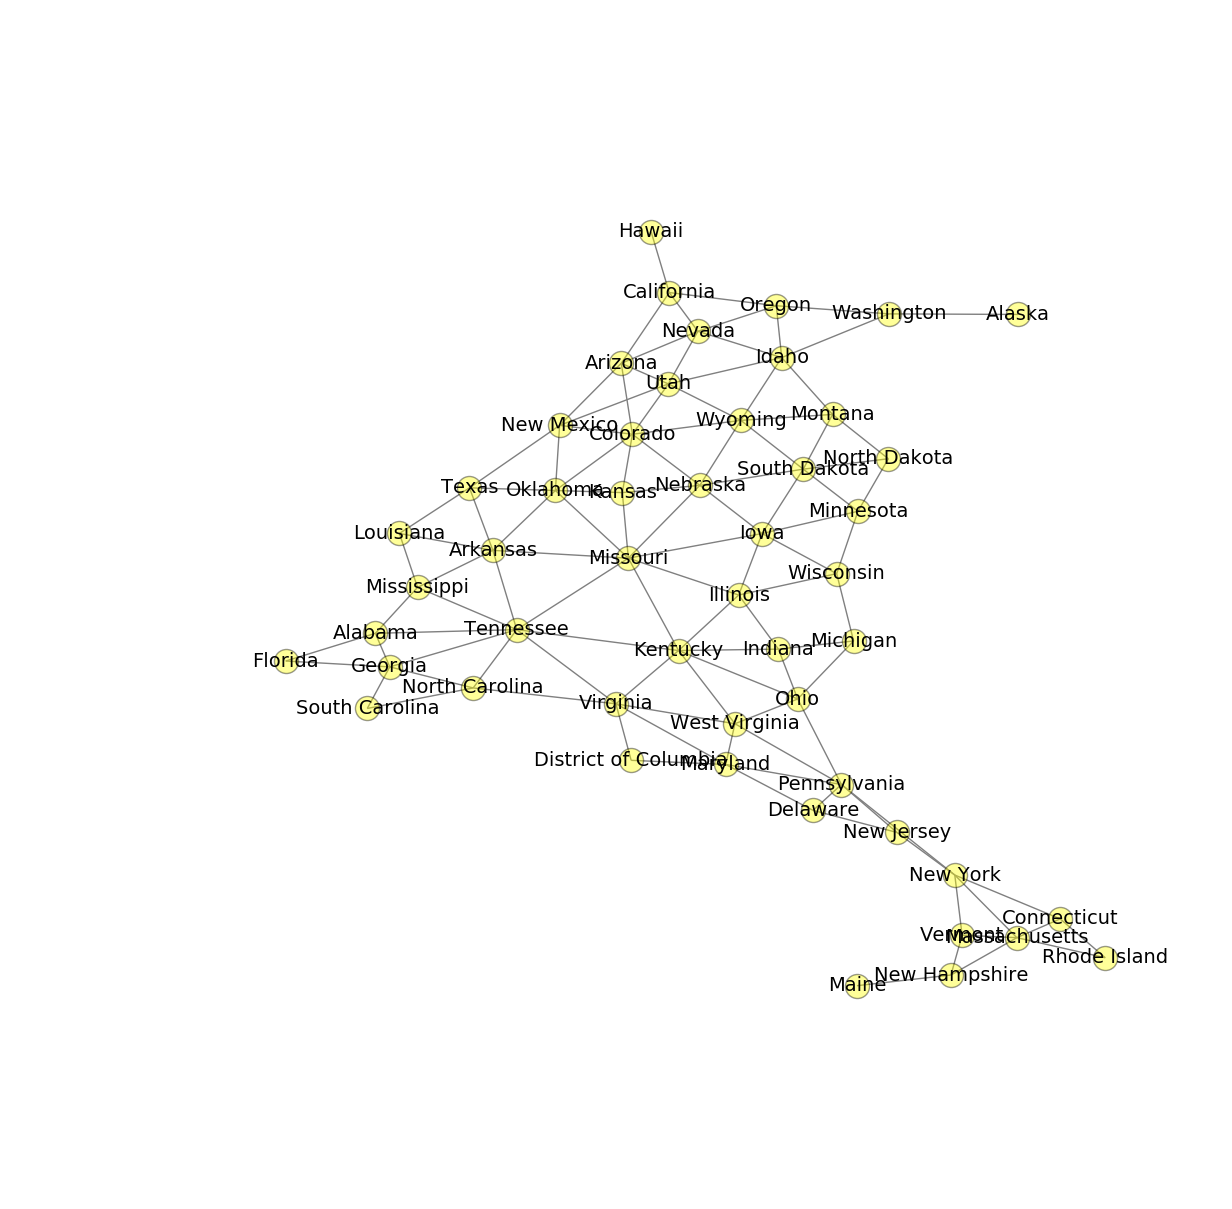

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

USA = nx.Graph()
USA.add_nodes_from(statenames.values(), freq=None)
USA.add_edges_from(neighbourpairs)

nx.spring_layout(USA)

plt.figure(figsize=(15,15))

pos = nx.spring_layout(USA)
nx.draw_networkx_nodes(USA, pos, 
                        nodelist=USA.nodes(),
                        node_color="yellow",
                        alpha=0.4)
nx.draw_networkx_labels(USA, pos, 
                        nodelist=USA.nodes(), 
                        font_size=14)
nx.draw_networkx_edges(USA, pos, 
                        edgelist=USA.edges(),
                        edge_color="grey")
plt.axis('off')
plt.show()

In [4]:
def pairCheck(graph, node1, node2):
    '''
    Returns True if both nodes don't share a radio frequency.
    '''
    if graph.node[node1]['freq'] is not None and graph.node[node2]['freq'] is not None and graph.node[node1]['freq'] == graph.node[node2]['freq']:
        return False
    return True

In [5]:
def neighborCheck(graph, node):
    '''
    Returns True if node doens't share a frequency with any of its neighbours.
    '''
    for neighbor in nx.all_neighbors(graph, node):
        if not pairCheck(graph, node, neighbor):
            return False
    return True

In [6]:
def graphCheck(graph):
    '''
    Returns True if all nodes don't share a frequency with any of their neighbours.
    '''
    for node in graph.nodes():
        if not neighborCheck(graph, node):
            return False
        
    if None in nx.get_node_attributes(graph, 'freq').values():
        return False
    
    return True

In [7]:
def greedyColor(graph):
    '''
    '''
    for n in graph.nodes():
        graph.node[n]['freq'] = 1
        while neighborCheck(graph, n) == False:
            graph.node[n]['freq'] += 1

In [8]:
greedyColor(USA)
print(graphCheck(USA))
nx.get_node_attributes(USA, 'freq')

True


{'Alabama': 3,
 'Alaska': 1,
 'Arizona': 1,
 'Arkansas': 2,
 'California': 4,
 'Colorado': 2,
 'Connecticut': 3,
 'Delaware': 1,
 'District of Columbia': 1,
 'Florida': 1,
 'Georgia': 2,
 'Hawaii': 1,
 'Idaho': 1,
 'Illinois': 1,
 'Indiana': 4,
 'Iowa': 4,
 'Kansas': 4,
 'Kentucky': 3,
 'Louisiana': 3,
 'Maine': 2,
 'Maryland': 4,
 'Massachusetts': 2,
 'Michigan': 1,
 'Minnesota': 3,
 'Mississippi': 4,
 'Missouri': 5,
 'Montana': 4,
 'Nebraska': 1,
 'Nevada': 2,
 'New Hampshire': 1,
 'New Jersey': 2,
 'New Mexico': 5,
 'New York': 1,
 'North Carolina': 3,
 'North Dakota': 1,
 'Ohio': 2,
 'Oklahoma': 3,
 'Oregon': 3,
 'Pennsylvania': 3,
 'Rhode Island': 1,
 'South Carolina': 1,
 'South Dakota': 2,
 'Tennessee': 1,
 'Texas': 1,
 'Utah': 4,
 'Vermont': 3,
 'Virginia': 2,
 'Washington': 2,
 'West Virginia': 1,
 'Wisconsin': 2,
 'Wyoming': 3}